Kaggle website:
https://www.kaggle.com/competitions/higgs-boson/overview

Paper associated with the data: https://arxiv.org/pdf/1402.4735.pdf

# Standard Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder  
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [4]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Data collection and cleaning

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
cd drive/My\Drive

/content/drive/MyDrive


In [7]:
# Reading data
#train = pd.read_csv('./higgs-boson/training.zip')
test = pd.read_csv('./higgs-boson/test.zip')        #To do this you need to have the test.zip file downloaded

#print(train.shape,test.shape)

In [8]:
train_url = "https://github.com/karthikvasan99/higgs-boson-classification/blob/main/training.zip?raw=true"

train_alt = pd.read_csv(train_url, compression = 'zip')

train_alt.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [18]:
y = train_alt["Label"]
X = train_alt
X_test = test

In [19]:
X_test.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,350000,-999.000,79.589,23.916,3.036,-999.000,-999.000,-999.000,0.903,3.036,...,2.022,98.556,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000
1,350001,106.398,67.490,87.949,49.994,-999.000,-999.000,-999.000,2.048,2.679,...,-1.138,176.251,1,47.575,-0.553,-0.849,-999.000,-999.000,-999.000,47.575
2,350002,117.794,56.226,96.358,4.137,-999.000,-999.000,-999.000,2.755,4.137,...,-1.868,111.505,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
3,350003,135.861,30.604,97.288,9.104,-999.000,-999.000,-999.000,2.811,9.104,...,1.172,164.707,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
4,350004,74.159,82.772,58.731,89.646,1.347,536.663,-0.339,1.028,77.213,...,-0.231,869.614,3,254.085,-1.013,-0.334,185.857,0.335,2.587,599.213


In [20]:
X.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [21]:
X= X.drop(['EventId','Weight','Label'],axis = 1)
X_test = X_test.drop(['EventId'],axis = 1)

X.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000
4,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [22]:
X_test.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,-999.000,79.589,23.916,3.036,-999.000,-999.000,-999.000,0.903,3.036,56.018,...,2.022,98.556,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000
1,106.398,67.490,87.949,49.994,-999.000,-999.000,-999.000,2.048,2.679,132.865,...,-1.138,176.251,1,47.575,-0.553,-0.849,-999.000,-999.000,-999.000,47.575
2,117.794,56.226,96.358,4.137,-999.000,-999.000,-999.000,2.755,4.137,97.600,...,-1.868,111.505,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
3,135.861,30.604,97.288,9.104,-999.000,-999.000,-999.000,2.811,9.104,94.112,...,1.172,164.707,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
4,74.159,82.772,58.731,89.646,1.347,536.663,-0.339,1.028,77.213,721.552,...,-0.231,869.614,3,254.085,-1.013,-0.334,185.857,0.335,2.587,599.213


In [23]:
X_train = np.asarray(X)[0:1000,:]
X_val = np.asarray(X)[1000:1500,:]
y_train = np.asarray(y)[0:1000]
y_val = np.asarray(y)[1000:1500]
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(1000, 30)
(1000,)
(500, 30)
(500,)


#Label encoding

In [24]:
y_val

array(['b', 'b', 'b', 's', 's', 's', 's', 's', 's', 'b', 's', 'b', 's',
       'b', 'b', 's', 'b', 'b', 's', 'b', 'b', 's', 'b', 's', 's', 's',
       'b', 'b', 'b', 's', 'b', 's', 'b', 's', 's', 'b', 's', 'b', 'b',
       'b', 'b', 'b', 's', 's', 'b', 's', 'b', 'b', 'b', 's', 's', 'b',
       's', 'b', 'b', 's', 's', 's', 'b', 'b', 'b', 's', 's', 'b', 'b',
       's', 'b', 's', 'b', 'b', 'b', 's', 's', 'b', 'b', 's', 'b', 'b',
       's', 'b', 'b', 'b', 'b', 'b', 's', 'b', 'b', 'b', 's', 'b', 'b',
       's', 'b', 'b', 'b', 'b', 's', 'b', 'b', 's', 'b', 's', 's', 'b',
       'b', 's', 's', 'b', 's', 'b', 'b', 'b', 's', 's', 'b', 'b', 's',
       'b', 's', 's', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 's',
       'b', 's', 'b', 's', 'b', 'b', 'b', 's', 'b', 'b', 's', 'b', 'b',
       's', 's', 's', 's', 'b', 's', 'b', 'b', 's', 'b', 's', 'b', 's',
       'b', 'b', 's', 's', 'b', 'b', 'b', 'b', 'b', 's', 'b', 'b', 'b',
       'b', 's', 'b', 'b', 'b', 'b', 'b', 's', 'b', 's', 'b', 'b

In [25]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.transform(y_val)

In [26]:
le.inverse_transform([0,1])

array(['b', 's'], dtype=object)

#Scaling features

In [27]:
std = StandardScaler()

X_train = std.fit_transform(X_train)        #For training our model
X_val = std.transform(X_val)                #For validating oue model
X_test = std.transform(np.asarray(X_test))  #For submission

In [ ]:
#Code to check mean and std of scaled data

#for i in range(30):
#  print(np.round(np.mean(X_train[:,i]),decimals=2),np.round(np.std(X_train[:,i]),decimals=2))

# Classification already

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       338
           1       0.69      0.65      0.67       162

    accuracy                           0.79       500
   macro avg       0.77      0.76      0.76       500
weighted avg       0.79      0.79      0.79       500



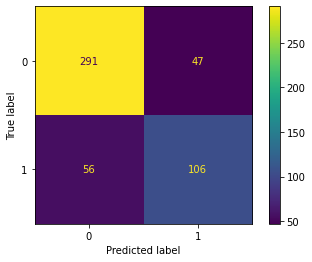

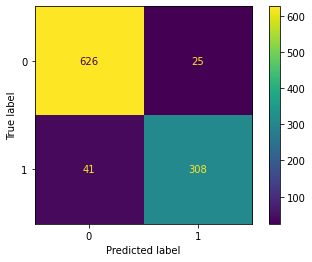

In [29]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(classification_report(y_val,y_pred))

cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

cm = confusion_matrix(y_train, model.predict(X_train))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [30]:
roc_auc_score(y_val,model.predict_proba(X_val)[:,1])

0.8559518591569873

In [33]:
loss=['deviance','exponential']
learning_rate = [0.01,0.05,0.1]
max_depth=[3,5,7,9]
current_accuracy=0
best_accuracy = 0
best_model = None
for L in loss:
  for lr in learning_rate:
    for md in max_depth:
      model = GradientBoostingClassifier(loss=L, learning_rate=lr, max_depth=md)
      model.fit(X_train, y_train)
      y_pred = model.predict(X_val)
      current_accuracy = accuracy_score(y_val,y_pred,normalize=True)
      print(current_accuracy,best_accuracy,L,lr,md)
      if current_accuracy >= best_accuracy:
        best_accuracy = current_accuracy
        best_model = model
        parameters = [L,lr,md,best_accuracy]
print(parameters,best_accuracy)

0.792 0 deviance 0.01 3
0.782 0.792 deviance 0.01 5
0.756 0.792 deviance 0.01 7
0.728 0.792 deviance 0.01 9
0.8 0.792 deviance 0.05 3
0.786 0.8 deviance 0.05 5
0.786 0.8 deviance 0.05 7
0.778 0.8 deviance 0.05 9
0.79 0.8 deviance 0.1 3
0.792 0.8 deviance 0.1 5
0.792 0.8 deviance 0.1 7
0.782 0.8 deviance 0.1 9
0.79 0.8 exponential 0.01 3
0.782 0.8 exponential 0.01 5
0.758 0.8 exponential 0.01 7
0.736 0.8 exponential 0.01 9
0.81 0.8 exponential 0.05 3
0.794 0.81 exponential 0.05 5
0.792 0.81 exponential 0.05 7
0.758 0.81 exponential 0.05 9
0.796 0.81 exponential 0.1 3
0.794 0.81 exponential 0.1 5
0.798 0.81 exponential 0.1 7
0.796 0.81 exponential 0.1 9
['exponential', 0.05, 3, 0.81] 0.81


In [34]:
roc_auc_score(y_val,best_model.predict_proba(X_val)[:,1])

0.8614581050478486

## Prediction for this model

In [39]:
predictions = best_model.predict(X_test)

In [43]:
pp = best_model.predict_proba(X_test)[:,1]

In [44]:
predictions.shape

(550000,)

In [45]:
pp.shape

(550000,)

#Polynomial Features

In [58]:
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X_train)

In [59]:
X_test_1_poly = poly.transform(X_test[:100000,:])
X_test_2_poly = poly.transform(X_test[100000:200000,:])

In [60]:
X_test_3_poly = poly.transform(X_test[200000:300000,:])

In [61]:
X_test_4_poly = poly.transform(X_test[300000:400000,:])

In [62]:
X_test_5_poly = poly.transform(X_test[400000:500000,:])
X_test_6_poly = poly.transform(X_test[500000:,:])

In [63]:
X_val_poly = poly.transform(X_val)

#PCA

In [64]:
pca = PCA(50)
X_poly_pca = pca.fit_transform(X_poly)
X_val_poly_pca = pca.transform(X_val_poly)

In [65]:
print(X_poly.shape,X_poly_pca.shape)

(1000, 496) (1000, 50)


0.9167669930093665


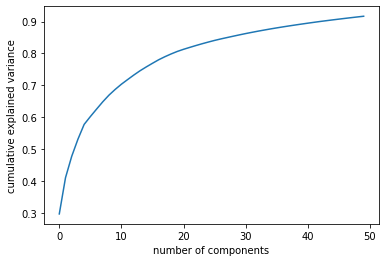

In [66]:
print(np.sum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [67]:
X_test_1_pca = pca.transform(X_test_1_poly)

In [68]:
X_test_2_pca = pca.transform(X_test_2_poly)

In [69]:
X_test_3_pca = pca.transform(X_test_3_poly)
X_test_4_pca = pca.transform(X_test_4_poly)
X_test_5_pca = pca.transform(X_test_5_poly)
X_test_6_pca = pca.transform(X_test_6_poly)

#Models

## SVC

              precision    recall  f1-score   support

           0       0.74      0.91      0.82       338
           1       0.65      0.35      0.45       162

    accuracy                           0.73       500
   macro avg       0.70      0.63      0.64       500
weighted avg       0.71      0.73      0.70       500



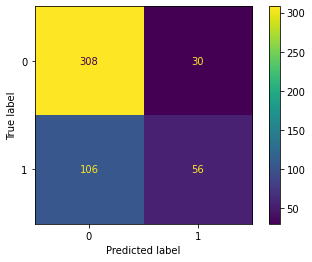

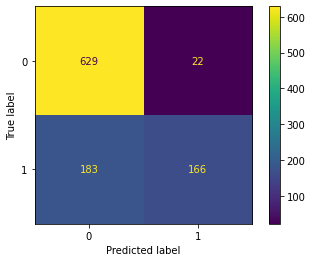

In [ ]:
model = SVC()
model.fit(X_poly_pca, y_train)
y_pred = model.predict(X_val_poly_pca)
print(classification_report(y_val,y_pred))

cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

cm = confusion_matrix(y_train, model.predict(X_poly_pca))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## Random Forest Classifier

Best with default parameters

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       338
           1       0.68      0.54      0.60       162

    accuracy                           0.77       500
   macro avg       0.74      0.71      0.72       500
weighted avg       0.76      0.77      0.76       500



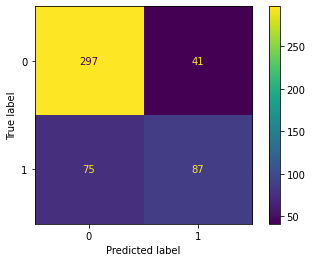

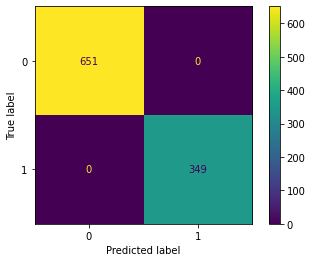

In [70]:
model = RandomForestClassifier()
model.fit(X_poly_pca, y_train)
y_pred = model.predict(X_val_poly_pca)
print(classification_report(y_val,y_pred))

cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

cm = confusion_matrix(y_train, model.predict(X_poly_pca))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## Gradient Boosting Classifier

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       338
           1       0.66      0.60      0.63       162

    accuracy                           0.77       500
   macro avg       0.74      0.73      0.73       500
weighted avg       0.77      0.77      0.77       500



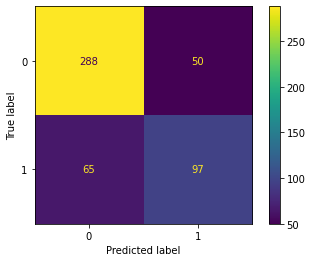

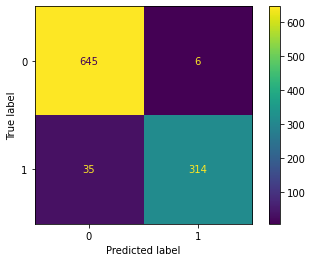

In [71]:
model = GradientBoostingClassifier()
model.fit(X_poly_pca, y_train)
y_pred = model.predict(X_val_poly_pca)
print(classification_report(y_val,y_pred))

cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

cm = confusion_matrix(y_train, model.predict(X_poly_pca))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

#Grid Search

## GradientBoostClassifier

In [72]:
loss=['deviance','exponential']
learning_rate = [0.01,0.05,0.1]
max_depth=[3,5,7,9]
current_accuracy=0
best_accuracy = 0
best_model = None
for L in loss:
  for lr in learning_rate:
    for md in max_depth:
      model = GradientBoostingClassifier(loss=L, learning_rate=lr, max_depth=md)
      model.fit(X_poly_pca, y_train)
      y_pred = model.predict(X_val_poly_pca)
      current_accuracy = accuracy_score(y_val,y_pred,normalize=True)
      print(current_accuracy,best_accuracy,L,lr,md)
      if current_accuracy >= best_accuracy:
        best_accuracy = current_accuracy
        best_model = model
        parameters = [L,lr,md,best_accuracy]
print(parameters)

0.704 0 deviance 0.01 3
0.752 0.704 deviance 0.01 5
0.756 0.752 deviance 0.01 7
0.734 0.756 deviance 0.01 9
0.754 0.756 deviance 0.05 3
0.764 0.756 deviance 0.05 5
0.776 0.764 deviance 0.05 7
0.772 0.776 deviance 0.05 9
0.772 0.776 deviance 0.1 3
0.766 0.776 deviance 0.1 5
0.776 0.776 deviance 0.1 7
0.762 0.776 deviance 0.1 9
0.7 0.776 exponential 0.01 3
0.736 0.776 exponential 0.01 5
0.764 0.776 exponential 0.01 7
0.736 0.776 exponential 0.01 9
0.752 0.776 exponential 0.05 3
0.778 0.776 exponential 0.05 5
0.764 0.778 exponential 0.05 7
0.786 0.778 exponential 0.05 9
0.76 0.786 exponential 0.1 3
0.77 0.786 exponential 0.1 5
0.77 0.786 exponential 0.1 7
0.768 0.786 exponential 0.1 9
['exponential', 0.05, 9, 0.786] 0.786


In [ ]:
best_model.predict_proba(X_val_poly_pca)

array([[9.95018406e-01, 4.98159366e-03],
       [9.97605433e-01, 2.39456667e-03],
       [9.95279917e-01, 4.72008332e-03],
       [1.70279270e-02, 9.82972073e-01],
       [8.62368359e-03, 9.91376316e-01],
       [8.46087294e-01, 1.53912706e-01],
       [9.70785652e-01, 2.92143482e-02],
       [3.32313541e-02, 9.66768646e-01],
       [1.10207451e-01, 8.89792549e-01],
       [2.79666249e-01, 7.20333751e-01],
       [9.93069727e-01, 6.93027281e-03],
       [9.96480598e-01, 3.51940212e-03],
       [6.30518705e-01, 3.69481295e-01],
       [9.95095334e-01, 4.90466559e-03],
       [9.68237498e-01, 3.17625022e-02],
       [7.04140620e-03, 9.92958594e-01],
       [7.59871401e-01, 2.40128599e-01],
       [9.88523221e-01, 1.14767787e-02],
       [1.94172937e-02, 9.80582706e-01],
       [6.92906378e-01, 3.07093622e-01],
       [9.97946218e-01, 2.05378196e-03],
       [9.42474086e-01, 5.75259141e-02],
       [9.94592546e-01, 5.40745401e-03],
       [9.98485598e-01, 1.51440194e-03],
       [1.284361

In [ ]:
roc_auc_score(y_val,best_model.predict_proba(X_val_poly_pca)[:,1])

0.8327306596537365

#Prediction

In [73]:
prediction_1 = best_model.predict(X_test_1_pca)

In [74]:
prediction_2 = best_model.predict(X_test_2_pca)

In [75]:
prediction_3 = best_model.predict(X_test_3_pca)

In [76]:
prediction_4 = best_model.predict(X_test_4_pca)

In [77]:
prediction_5 = best_model.predict(X_test_5_pca)

In [78]:
prediction_6 = best_model.predict(X_test_6_pca)

In [80]:
predictions = np.hstack((prediction_1, prediction_2, prediction_3, prediction_4, prediction_5, prediction_6))

In [81]:
predictions.shape

(550000,)

In [82]:
pp_1 = best_model.predict_proba(X_test_1_pca)[:,1]
pp_2 = best_model.predict_proba(X_test_2_pca)[:,1]

In [83]:
pp_3 = best_model.predict_proba(X_test_3_pca)[:,1]
pp_4 = best_model.predict_proba(X_test_4_pca)[:,1]

In [84]:
pp_5 = best_model.predict_proba(X_test_5_pca)[:,1]
pp_6 = best_model.predict_proba(X_test_6_pca)[:,1]

In [85]:
pp = np.hstack((pp_1, pp_2, pp_3, pp_4, pp_5, pp_6))

In [86]:
pp.shape

(550000,)

# Submission

In [46]:
sub = pd.read_csv('./random_submission.zip')

In [87]:
sub

,EventId,RankOrder,Class
0,350000,416957,b
1,350001,89624,b
2,350002,519845,b
3,350003,510885,s
4,350004,455944,s
...,...,...,...
549995,899995,46701,s
549996,899996,323731,s
549997,899997,357749,s
549998,899998,486844,b


In [48]:
np.asarray([0.9,0.6,0.7,1,0,0.3]).argsort().argsort()+1 #This can be used to make rank order

array([5, 3, 4, 6, 1, 2])

##How does argsort work?

In [88]:
np.asarray([0.9,0.6,0.7,1,0,0.3]).argsort() #Returns the indices that would sort the array

array([4, 5, 1, 2, 0, 3])

In [90]:
np.asarray([0.9,0.6,0.7,1,0,0.3]).argsort().argsort() 

array([4, 2, 3, 5, 0, 1])

##Back to predictions

In [91]:
test_predict = pd.Series(predictions)

In [92]:
test_predict

0         0
1         0
2         1
3         1
4         0
         ..
549995    0
549996    1
549997    0
549998    1
549999    0
Length: 550000, dtype: int64

In [93]:
test_predict = pd.DataFrame({"EventId":sub['EventId'],"RankOrder":sub['RankOrder'],"Class":test_predict})
test_predict

,EventId,RankOrder,Class
0,350000,416957,0
1,350001,89624,0
2,350002,519845,1
3,350003,510885,1
4,350004,455944,0
...,...,...,...
549995,899995,46701,0
549996,899996,323731,1
549997,899997,357749,0
549998,899998,486844,1


In [94]:
test_predict = test_predict.replace(1,'s')
test_predict = test_predict.replace(0,'b')
test_predict

,EventId,RankOrder,Class
0,350000,416957,b
1,350001,89624,b
2,350002,519845,s
3,350003,510885,s
4,350004,455944,b
...,...,...,...
549995,899995,46701,b
549996,899996,323731,s
549997,899997,357749,b
549998,899998,486844,s


In [53]:
test_predict['RankOrder'] = pp.argsort().argsort() + 1 # +1 to start at 1

In [54]:
test_predict

,EventId,RankOrder,Class
0,350000,11268,b
1,350001,252742,b
2,350002,445643,s
3,350003,443564,s
4,350004,85752,b
...,...,...,...
549995,899995,181217,b
549996,899996,399895,s
549997,899997,110119,b
549998,899998,406256,s


In [57]:
test_predict.to_csv("submission.csv",index=False) #1517th

#Without PCA result

In [ ]:
#1354th withouth pca